# About Project- Customer Churn Analysis

Problem Statement:

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low.

We will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models.

# Predicting whether a customer will churn by learning models on telecom industry dataset provided by IBM data community-

This notebook covers following contents -

Reading the data

Overview of data's structure - how various features and their respective values look like?

Finding and handling missing values

Dealing with categorical attributes

Identifying higher correlation features (with the target)

Generating relevant insights about values of these high correlation features for churned customers (

Preparing data for models

Model generation and performance evaluation



In [1]:
#lets start working on it

Importing all required library

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import joblib
import warnings
warnings.filterwarnings("ignore")
#from sklearn.linear_model import LinearRegression
#from sklearn.naive_bayes import MultinomialNB
#from sklearn.svm import LinearSVC
#from sklearn.preprocessing import MinMaxScaler
#from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
#from scipy.stats import zscore


Load the Data

In [3]:
#uploading dataset
ds=pd.read_csv("Customer_Churn.csv")
ds

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
#changing Dataset in Dataframe
ds=pd.DataFrame(data=ds)

# Dataset basic details analysis (Null Value,data type, shape etc )

there are objects and int values are present in data set. We will change object values into int

In [5]:
#name of column index
ds.keys()

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
ds.shape

(7043, 21)

there are 7043 rows and 21 cloumns available in original dataset

In [7]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Observations: 

There are 16 object data and 3 int data in the given dataset.

We have to convert object columns in int value or drop in case they are not providing any proper informations.


In [8]:
ds.isnull()
#verifing the null value

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
# checking null value again in dataset
ds.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

there are no null values in this dataset

# Data Visuliazation

and deal with catagorical values

No     5174
Yes    1869
Name: Churn, dtype: int64

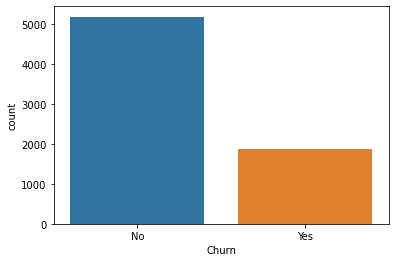

In [10]:
# Plot distribution of dependent/target variable - Churn column
 # To generate a count plot
sns.countplot(ds["Churn"])
ds['Churn'].value_counts()

([<matplotlib.patches.Wedge at 0x3fe9e36880>,
 [Text(-0.7393678277834757, 0.8144539368428056, 'No'),
  Text(0.7393677515287918, -0.8144540060674139, 'Yes')],
 [Text(-0.4032915424273503, 0.44424760191425755, '73.5%'),
  Text(0.4032915008338864, -0.4442476396731348, '26.5%')])

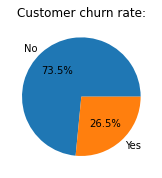

In [11]:
#lets create a pie chart to visualize the churn data
sizes = ds['Churn'].value_counts(sort = True)
labels = np.unique(ds.Churn)

# Visualize the data
plt.figure(figsize = (6,6))
plt.subplot(212)
plt.title("Customer churn rate:")
plt.pie(sizes, labels = labels, autopct='%1.1f%%')


In this Visuliazatin we can see that 26.5% ,customers are the Churn customer of company and 73.5% customners are non-churn customers

In [12]:
ds.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

there are objects and int values are present in data set. We will change object values into int

In [13]:
# Convert following object type columns to numeric        
ds.TotalCharges = pd.to_numeric(ds.TotalCharges, errors = 'coerce')

In [14]:
#lets check missing value in dataset
ds.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Output shows that there are 11 total missing values in TotalCharges column

In [15]:
# Fill the missing values with 0
ds['TotalCharges'] = ds['TotalCharges'].fillna(0.0)

# again Check missing values
print(ds.isnull().sum())
print('\n')
print(ds.dtypes)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges     

Now there are no missing value in this dataset. 

# Label Encoder

In [16]:
#lets deat with catagorical values and change into int values

In [17]:
ds.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [18]:
from sklearn.preprocessing import LabelEncoder
#transform non-numeric values into numeric
LE=LabelEncoder()

labelencoder_columns=['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']

for i in ds[labelencoder_columns]:
    ds[i]=LE.fit_transform(ds[i])

In [19]:
ds.dtypes

customerID           object
gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

We can drop Customer ID column as theres no need of id to predict churn customers

In [20]:
ds.drop(['customerID'],axis=1,inplace=True)
ds.head(8)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
5,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,820.50,1
6,1,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,89.10,1949.40,0
7,0,0,0,0,10,0,1,0,2,0,0,0,0,0,0,0,3,29.75,301.90,0


In [21]:
#checking number of unique values in dataset
ds.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

# Data Visuliazation

Univariate Analysis

Now Observing the target cloumn

0    5174
1    1869
Name: Churn, dtype: int64
No=0 Yes=1


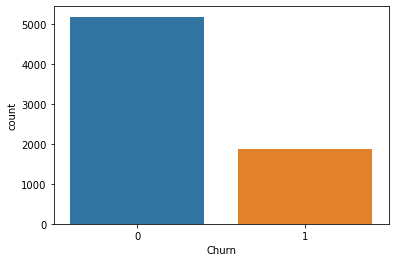

In [22]:
#By using count plot we can see the graph of Churn and Non churn customers
sns.countplot(ds["Churn"])
print(ds['Churn'].value_counts())
print('No=0','Yes=1')

0    3641
1    3402
Name: Partner, dtype: int64


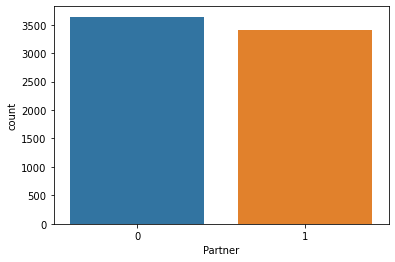

In [23]:
sns.countplot(ds["Partner"])
print(ds['Partner'].value_counts())


0    4933
1    2110
Name: Dependents, dtype: int64


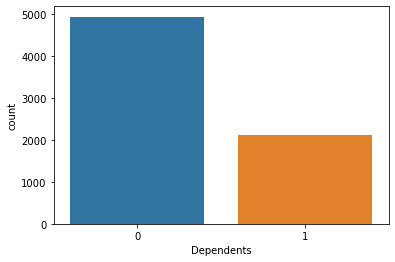

In [24]:
sns.countplot(ds["Dependents"])
print(ds['Dependents'].value_counts())


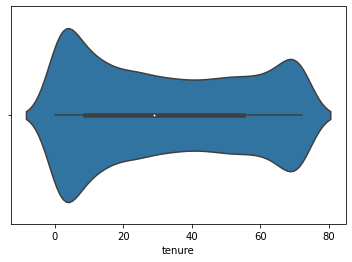

In [25]:
sns.violinplot(x="tenure",hue='Churn', data=ds)
plt.show()

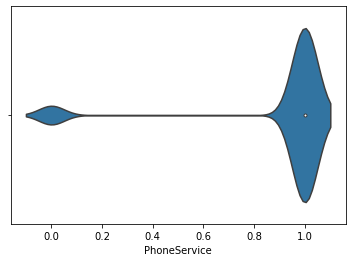

In [26]:
sns.violinplot(x="PhoneService",hue='Churn', data=ds)
plt.show()

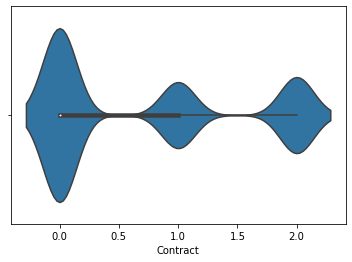

In [27]:
sns.violinplot(x="Contract",hue='Churn', data=ds)
plt.show()

In [28]:
ds.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

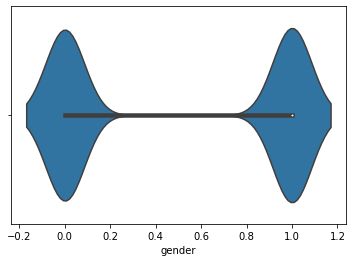

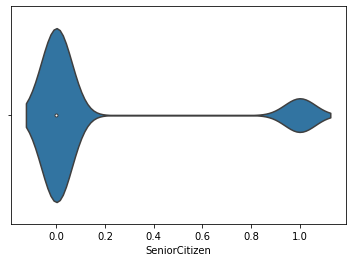

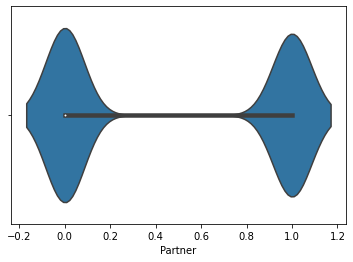

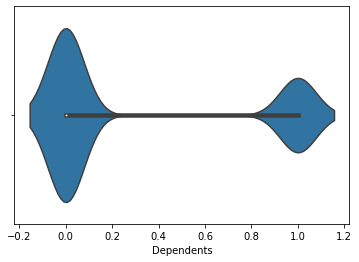

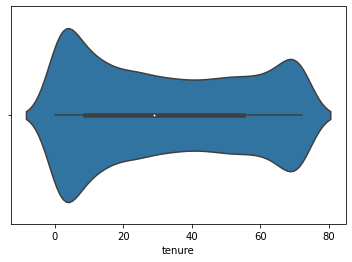

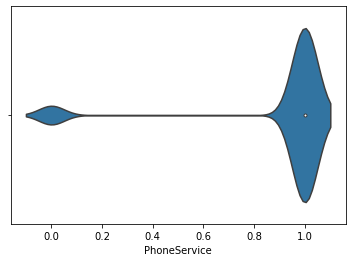

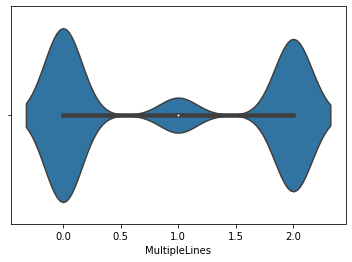

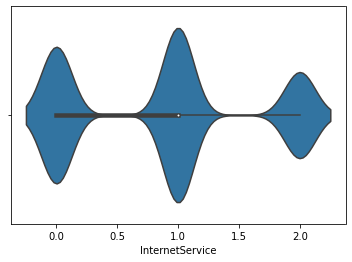

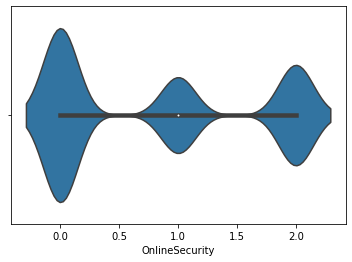

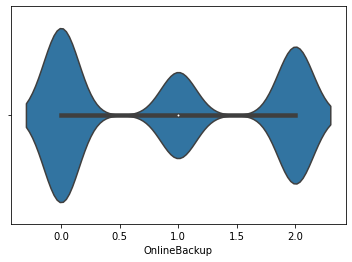

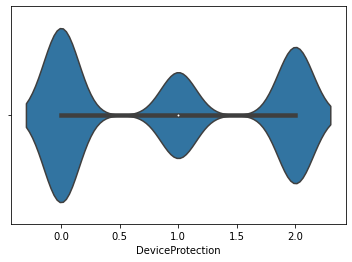

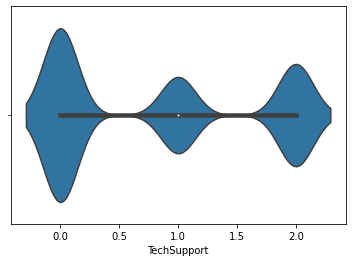

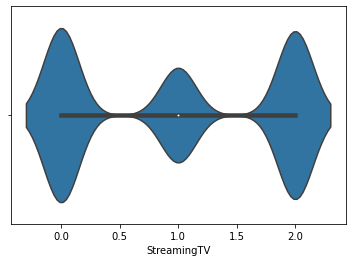

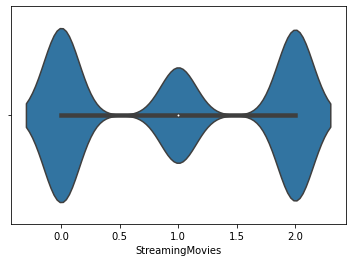

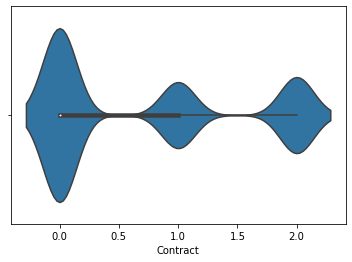

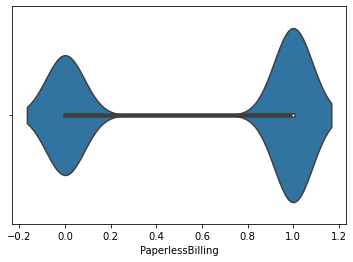

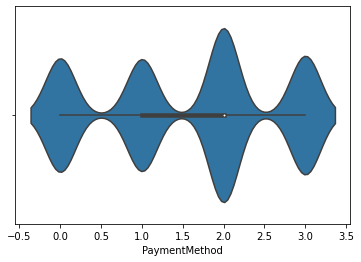

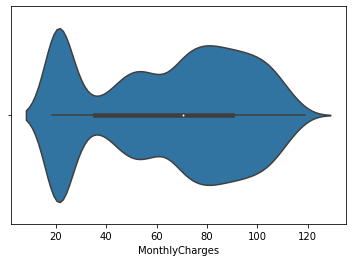

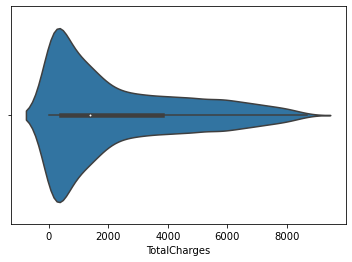

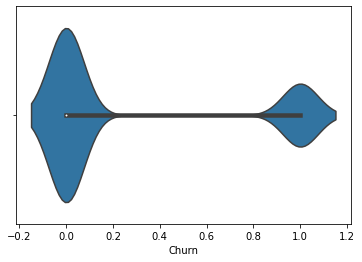

In [29]:
#using the below code creating violinplot.

columns1=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn']
for i in ds[columns1]:
    plt.figure()
    sns.violinplot(ds[i], data=ds)

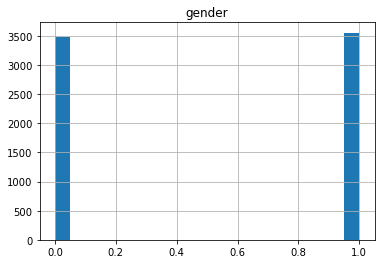

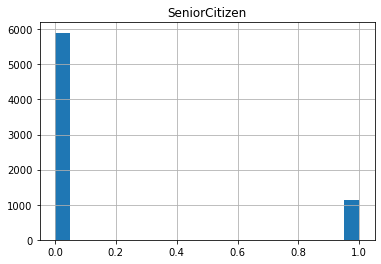

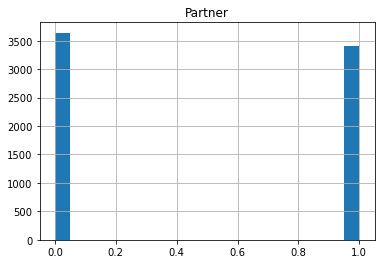

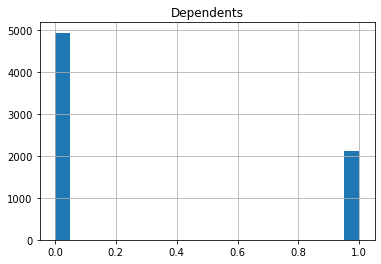

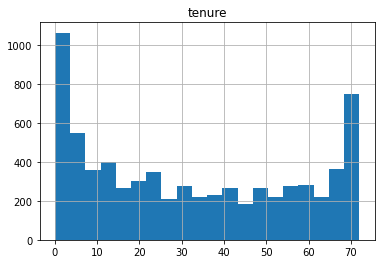

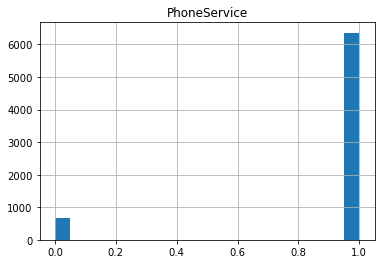

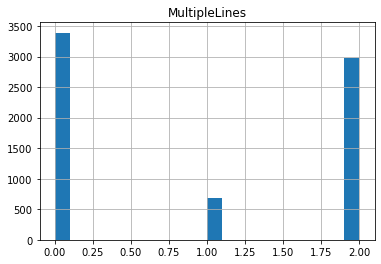

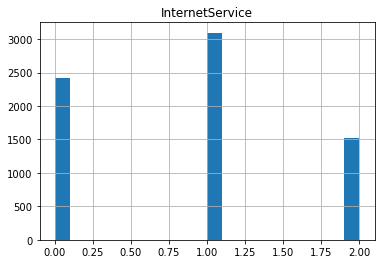

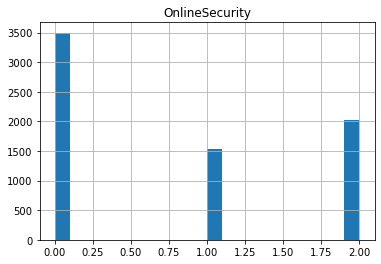

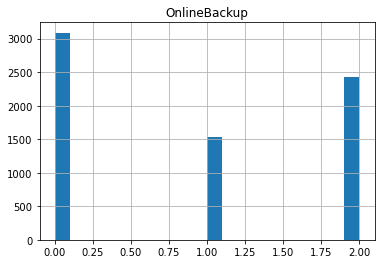

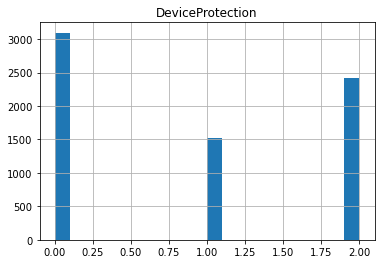

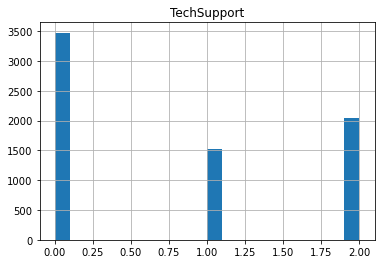

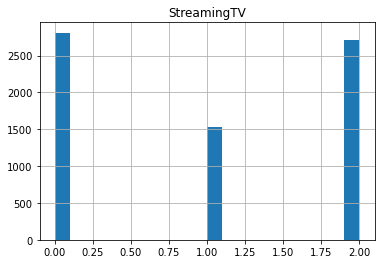

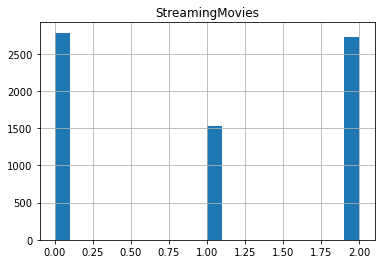

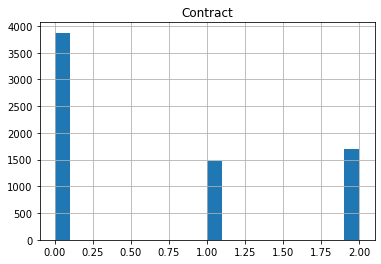

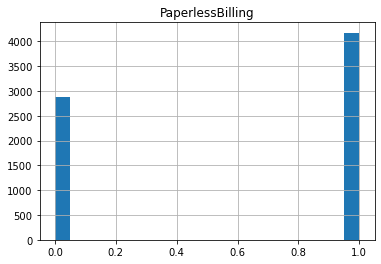

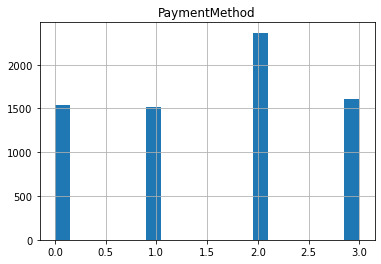

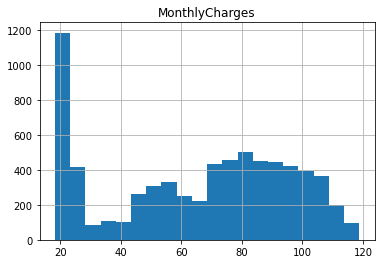

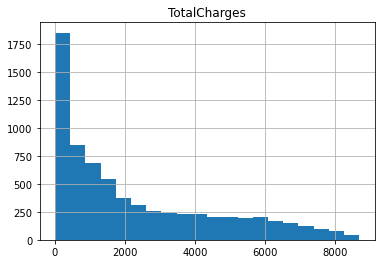

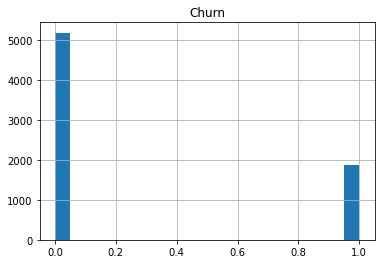

In [30]:
columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn']

for i in ds[columns]:
    plt.figure()
    plt.title(i)
    ds[i].hist(bins=20)

# Bivariate Analysis

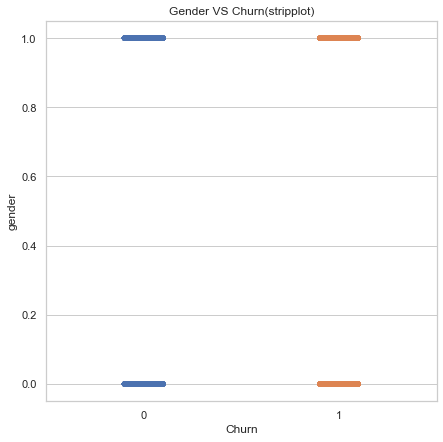

In [31]:
#stripplot between target variable and data variable.

plt.figure(figsize=[7,7])
sns.set(style="whitegrid")
ax=sns.stripplot(y="gender",x="Churn",data=ds) 
plt.title("Gender VS Churn(stripplot)")
plt.show()

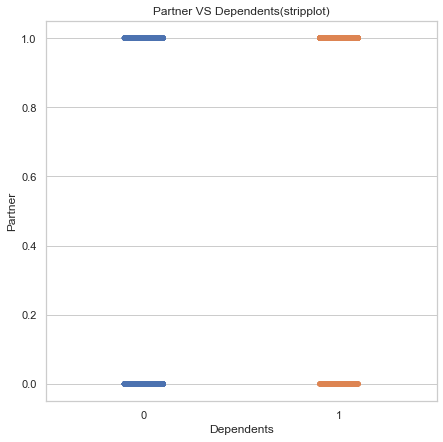

In [32]:
#stripplot between target variable and data variable.

plt.figure(figsize=[7,7])
sns.set(style="whitegrid")
ax=sns.stripplot(y="Partner",x="Dependents",data=ds) 
plt.title("Partner VS Dependents(stripplot)")
plt.show()

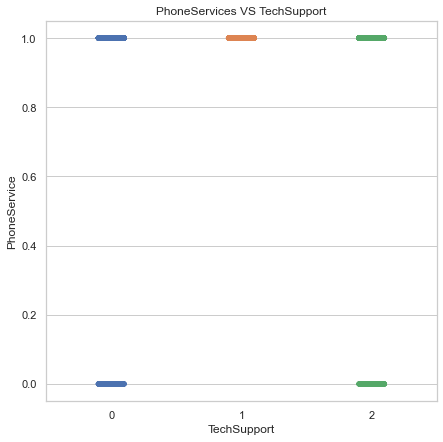

In [33]:
#stripplot between target variable and data variable.

plt.figure(figsize=[7,7])
sns.set(style="whitegrid")
ax=sns.stripplot(y="PhoneService",x="TechSupport",data=ds) 
plt.title("PhoneServices VS TechSupport")
plt.show()

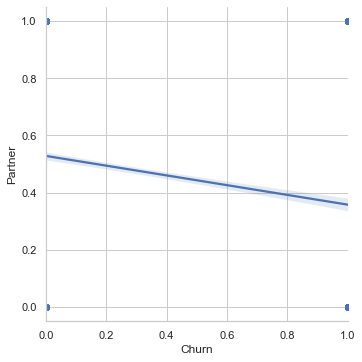

In [34]:
sns.lmplot(y="Partner",x="Churn",data=ds)

<AxesSubplot:xlabel='Churn', ylabel='Dependents'>

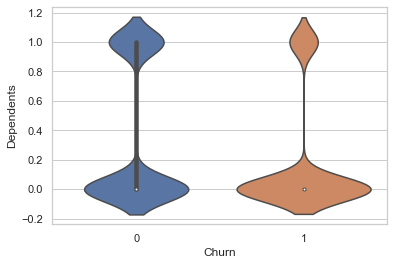

In [35]:
sns.violinplot(y="Dependents",x="Churn",data=ds)

<AxesSubplot:xlabel='SeniorCitizen', ylabel='Dependents'>

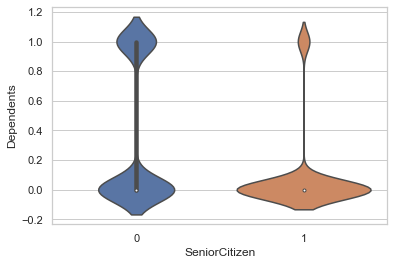

In [36]:
sns.violinplot(y="Dependents",x="SeniorCitizen",data=ds)

<AxesSubplot:xlabel='tenure', ylabel='TechSupport'>

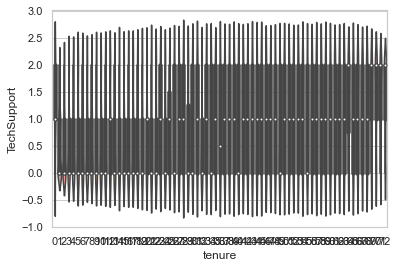

In [37]:
sns.violinplot(y="TechSupport",x="tenure",data=ds)

<AxesSubplot:xlabel='Churn', ylabel='PhoneService'>

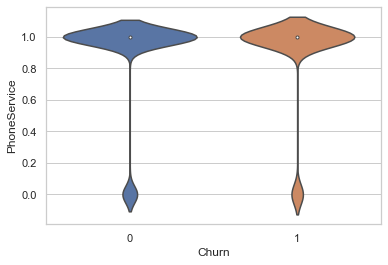

In [38]:
sns.violinplot(y="PhoneService",x="Churn",data=ds)

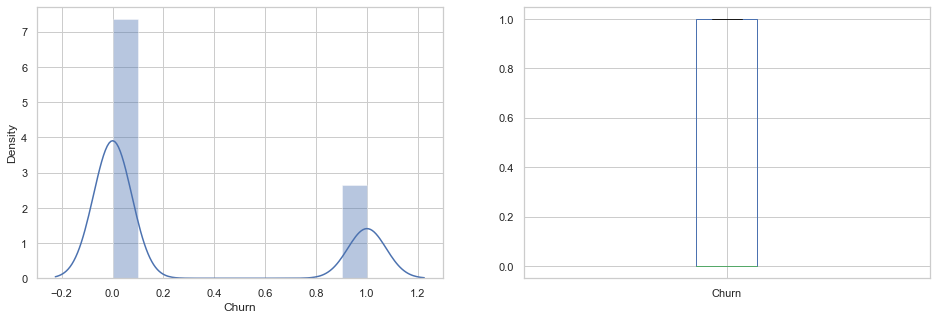

In [39]:
plt.figure(1)
plt.subplot(121)
sns.distplot(ds["Churn"]);

plt.subplot(122)
ds["Churn"].plot.box(figsize=(16,5))
plt.show()

Observation :
It can be inferred that most of the data in the distribution of churn customer is towards left which means it is not normally distributed. We will try to make it normal in later sections as algorithms works better if the data is normally distributed.

The boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the churn disparity in the society.


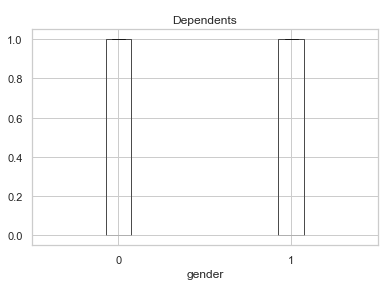

In [40]:
ds.boxplot(column='Dependents',by="gender" )
plt.suptitle(" ")
plt.show()

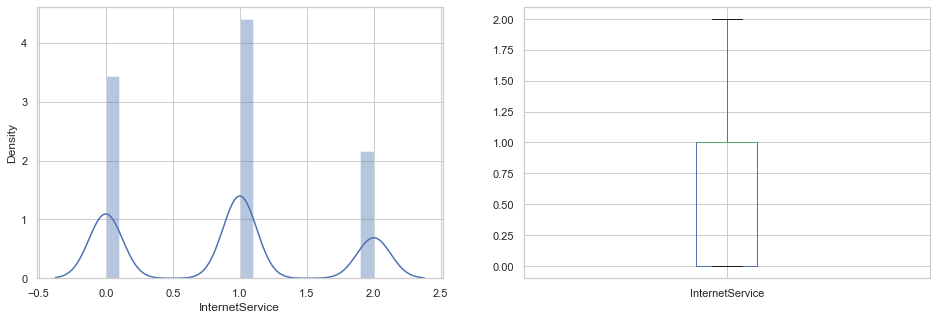

In [41]:
plt.subplot(121)
sns.distplot(ds["InternetService"]);

plt.subplot(122)
ds["InternetService"].plot.box(figsize=(16,5))
plt.show()

Obsevation :
We see a similar distribution as that of the InternetService. 

"LoanAmount" distribution :

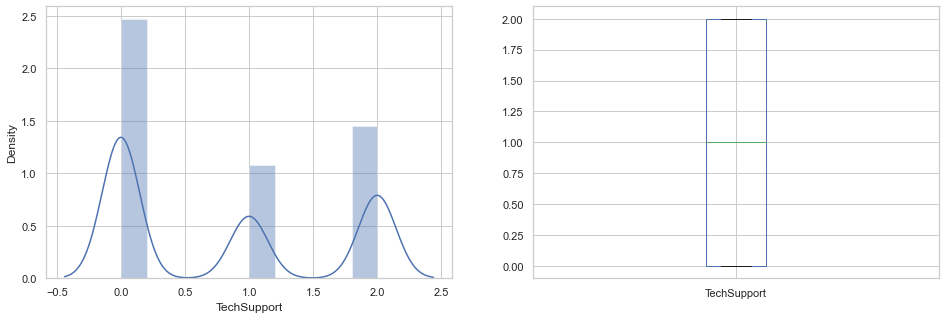

In [42]:
plt.figure(1)
plt.subplot(121)
sns.distplot(ds['TechSupport']);

plt.subplot(122)
ds['TechSupport'].plot.box(figsize=(16,5))

plt.show()

# (iii) Multivariate Analysis

Using Statistical approch 

In [43]:
#checking the correlations between columns
corr=ds.corr()
corr

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.000080,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.103006,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.317504,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.062078,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.826178,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.113214,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452577,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175755,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.253224,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.374410,-0.195525


<AxesSubplot:>

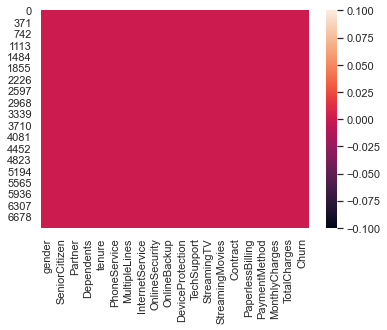

In [44]:
sns.heatmap(ds.isnull())

<AxesSubplot:>

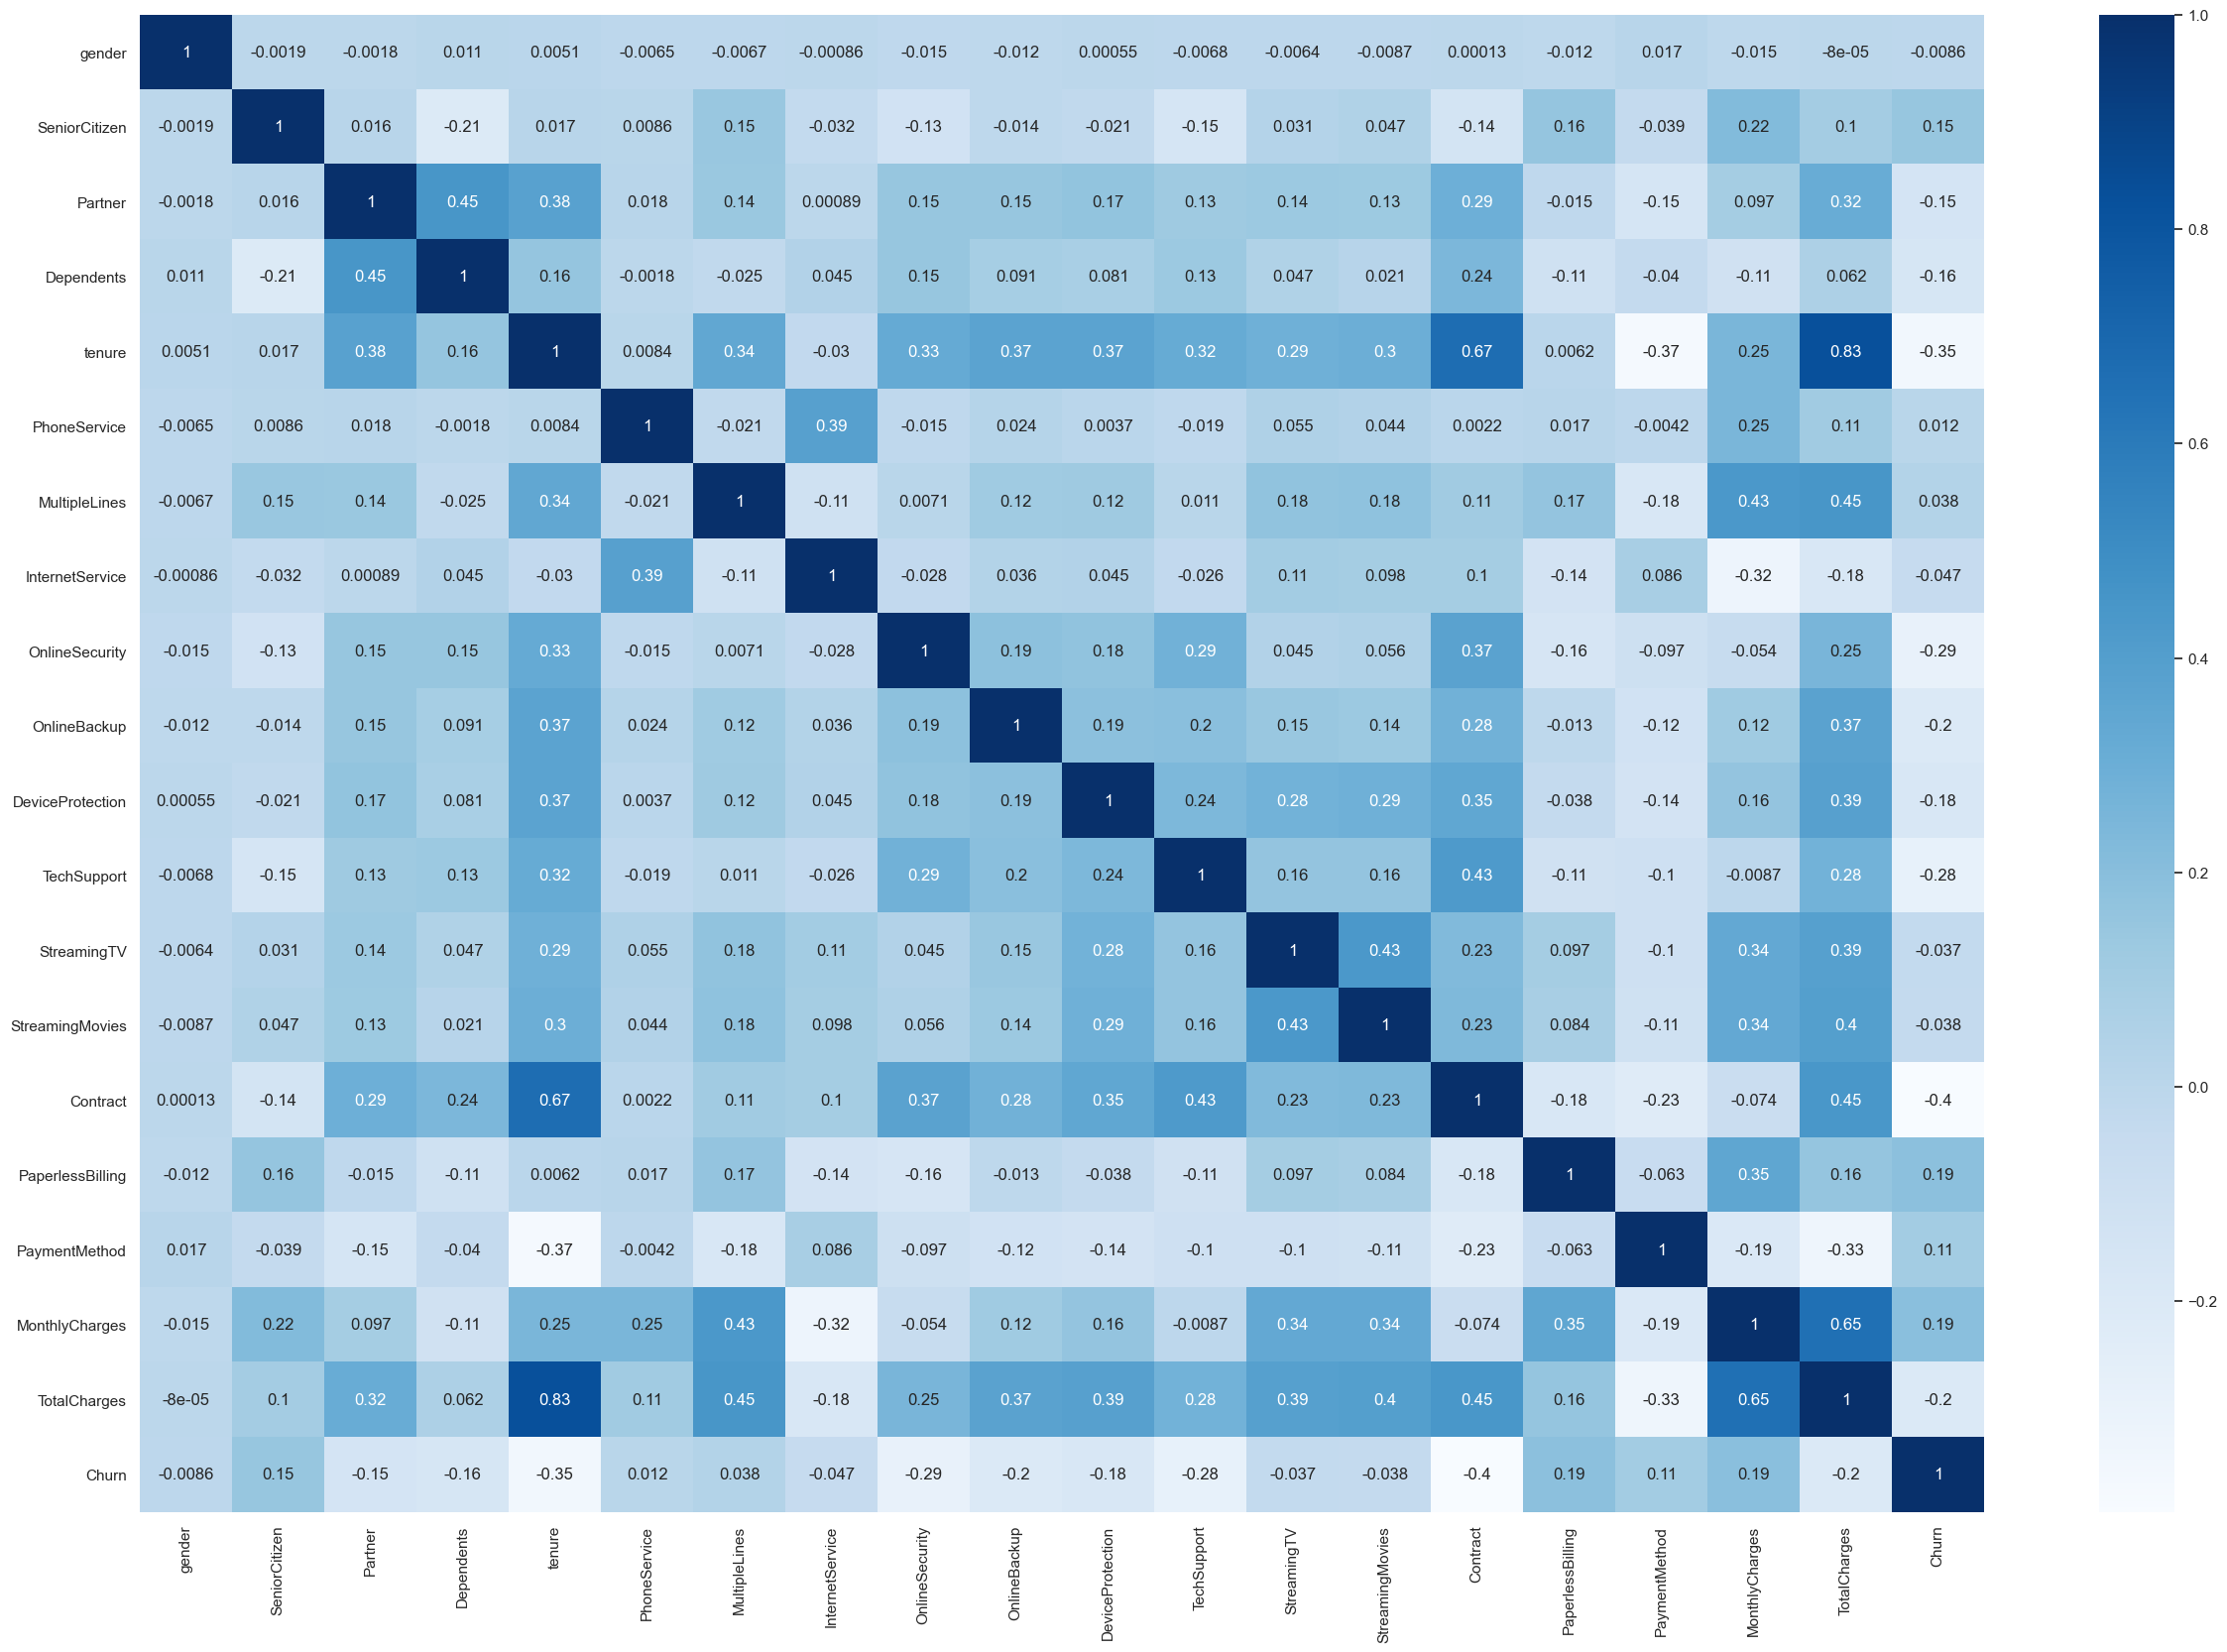

In [45]:
#example of multivariate 
#lets check the correlation matrix
#method ("pearson")

fig=plt.figure(figsize=(30,20),dpi=100)
hc=ds.corr(method="pearson")
sns.heatmap(hc,annot=True,cmap="Blues")

Observation: 
    There is good correlation between tenure and Totalcharges is 83%. also good corelation between tenure and COntract column.
       

In [46]:
corr_matrix=ds.corr()
corr_matrix['Churn'].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TotalCharges       -0.198324
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

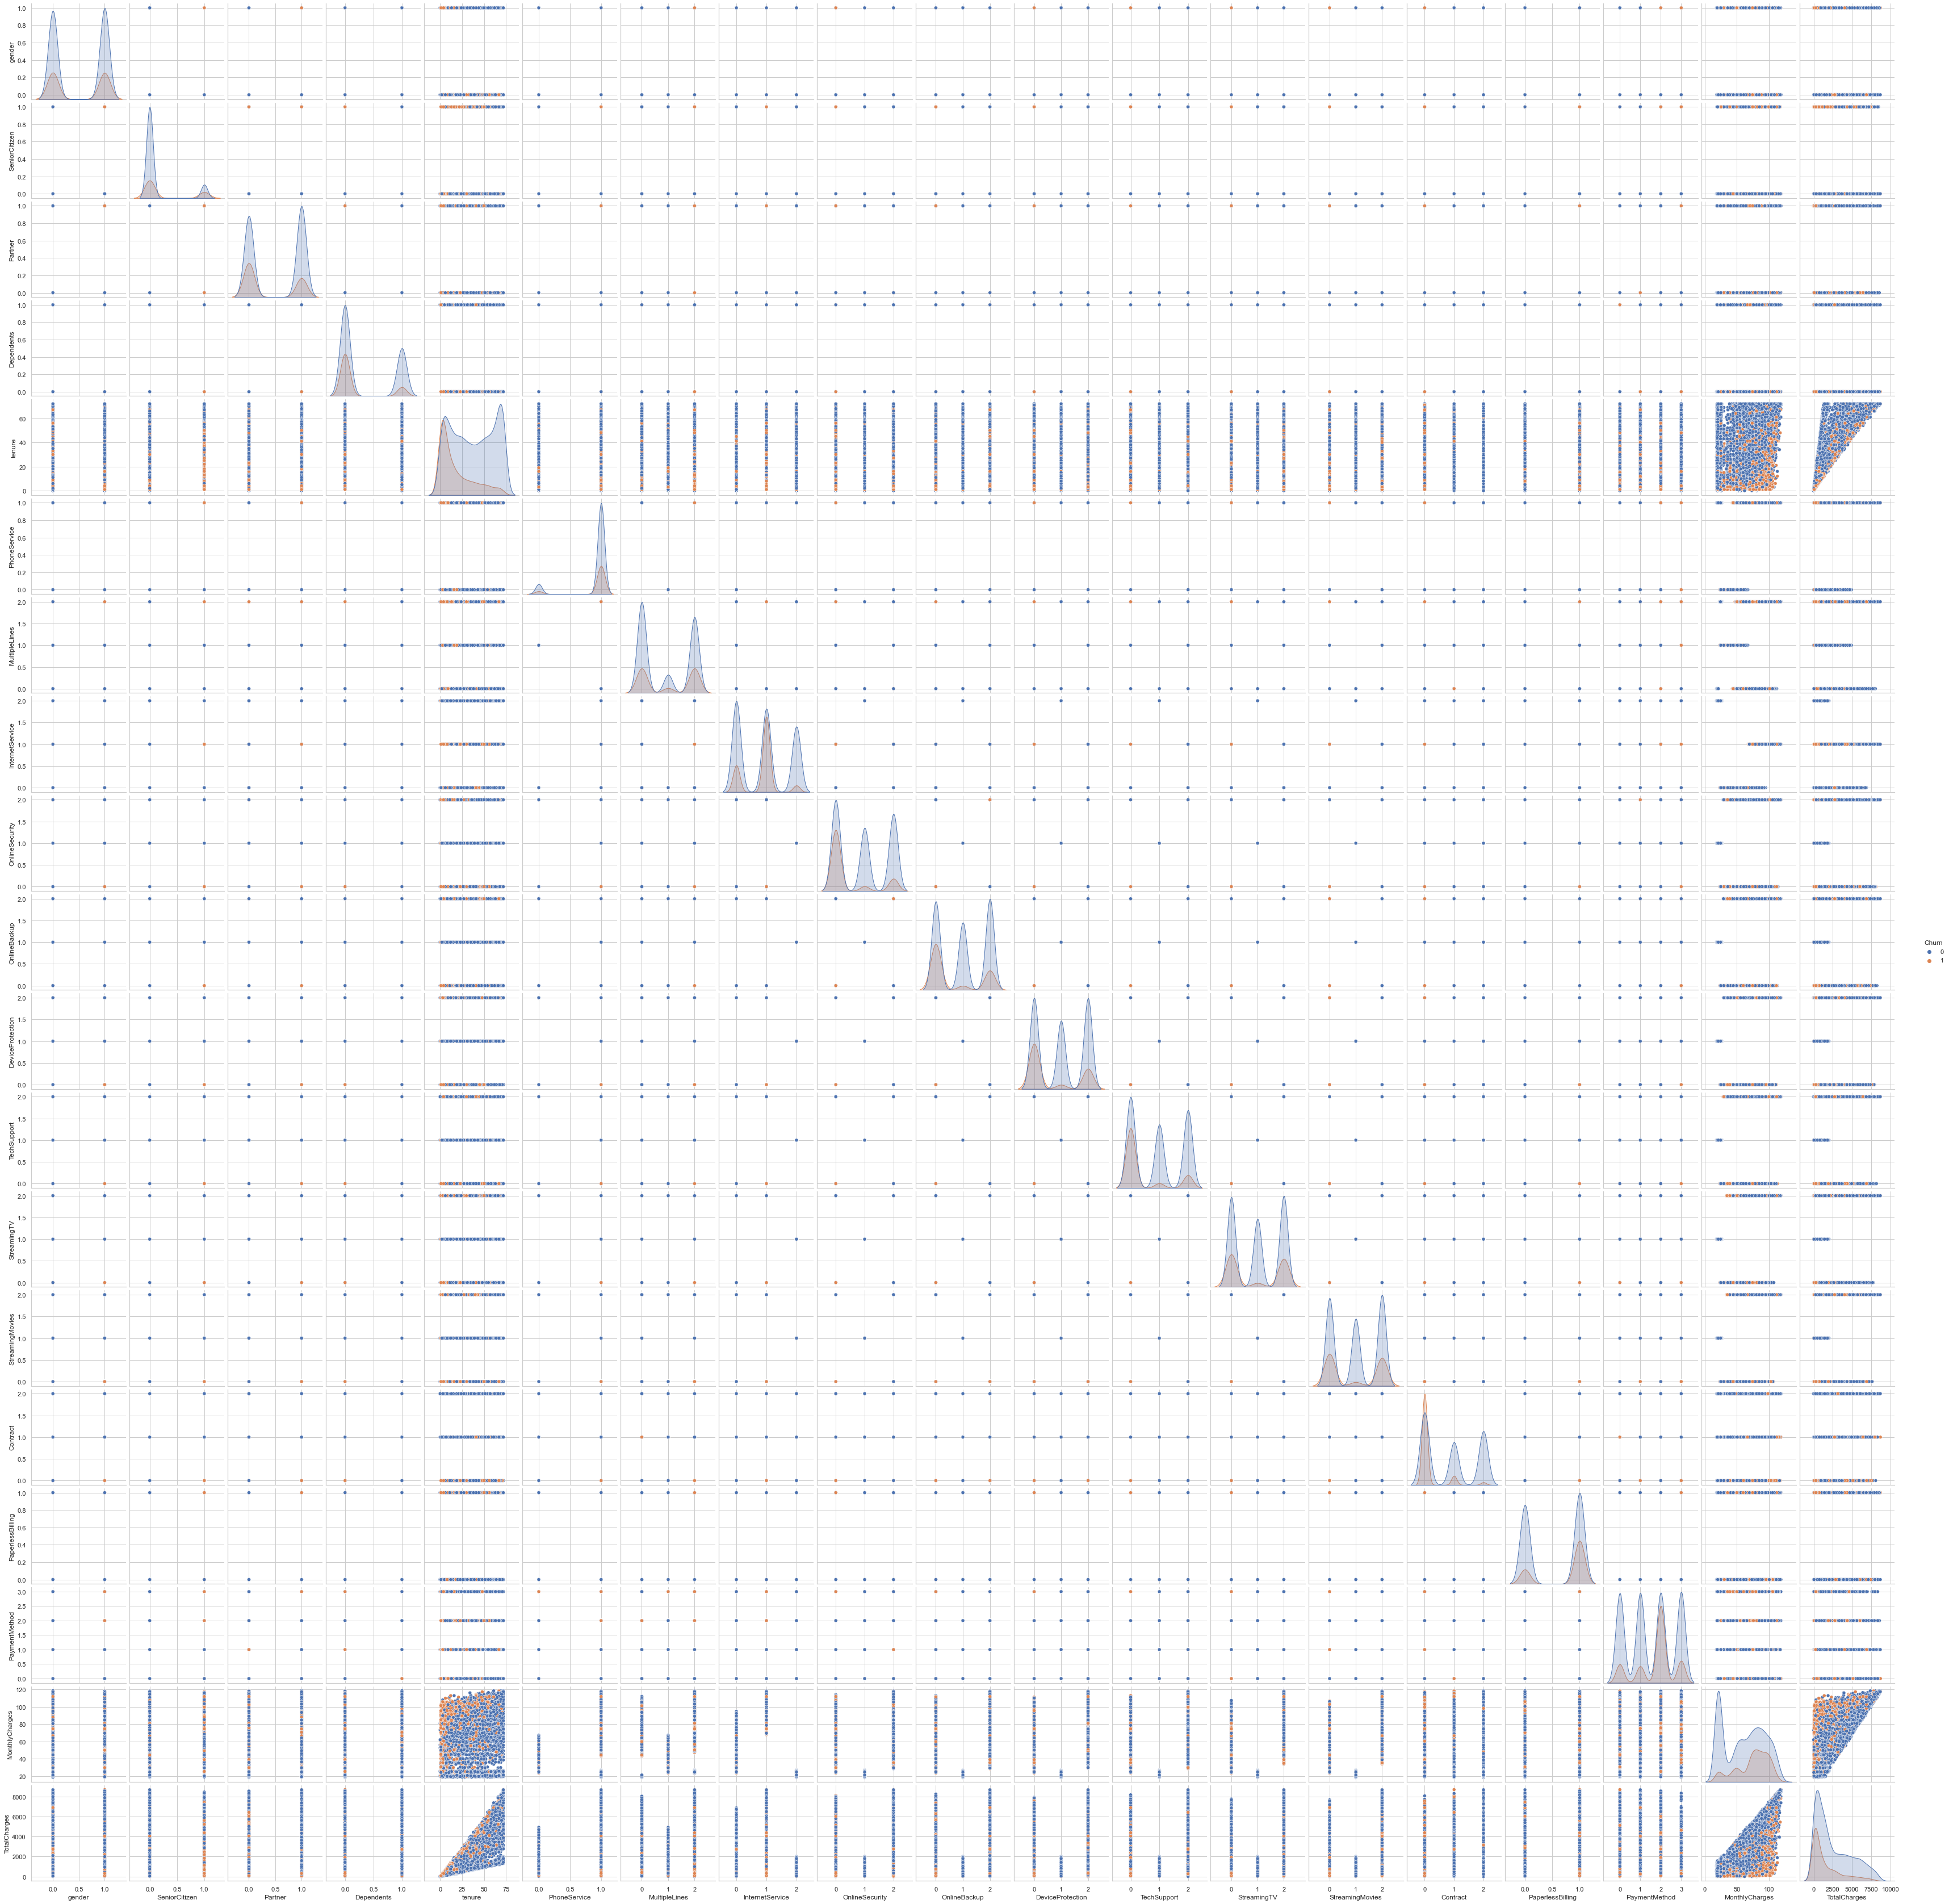

In [47]:
# Generate pairplots for all features.
highCorrCols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn']
sns.pairplot(ds[highCorrCols], hue = 'Churn')

# Plotting Data Cleaning and outlier Handling

gender                 AxesSubplot(0.125,0.749828;0.0945122x0.130172)
SeniorCitizen       AxesSubplot(0.238415,0.749828;0.0945122x0.130172)
Partner             AxesSubplot(0.351829,0.749828;0.0945122x0.130172)
Dependents          AxesSubplot(0.465244,0.749828;0.0945122x0.130172)
tenure              AxesSubplot(0.578659,0.749828;0.0945122x0.130172)
PhoneService        AxesSubplot(0.692073,0.749828;0.0945122x0.130172)
MultipleLines       AxesSubplot(0.805488,0.749828;0.0945122x0.130172)
InternetService        AxesSubplot(0.125,0.593621;0.0945122x0.130172)
OnlineSecurity      AxesSubplot(0.238415,0.593621;0.0945122x0.130172)
OnlineBackup        AxesSubplot(0.351829,0.593621;0.0945122x0.130172)
DeviceProtection    AxesSubplot(0.465244,0.593621;0.0945122x0.130172)
TechSupport         AxesSubplot(0.578659,0.593621;0.0945122x0.130172)
StreamingTV         AxesSubplot(0.692073,0.593621;0.0945122x0.130172)
StreamingMovies     AxesSubplot(0.805488,0.593621;0.0945122x0.130172)
Contract            

<Figure size 3000x2000 with 0 Axes>

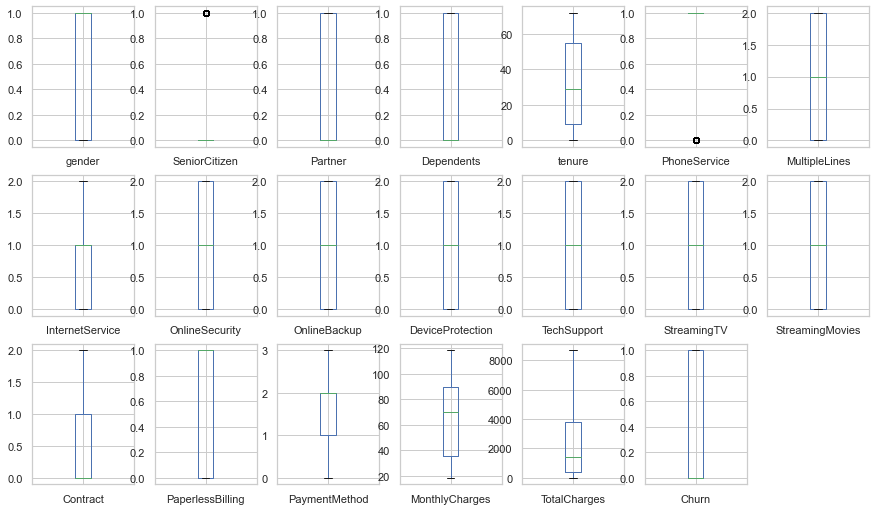

In [48]:
fig=plt.figure(figsize=(30,20),dpi=100)
ds.plot(kind="box",subplots=True,layout=(5,7),figsize=(15,15))

As we can see that there are no outlier so no need to treat outliers and skewness

# Prepare the data for Predicution and model training

# Model Building (Train test split)

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
#doing train and test to traing model
#x is the data value and y is the target value
#drop'class' cloumn
x=ds.drop(['Churn'],axis=1)
y=ds['Churn']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25, random_state=45)

print('X train.Shape:',x_train.shape)
print('X test.shape:',x_test.shape)
print('Y train.shape:',y_train.shape)
print('Y test.shape:',y_test.shape)

X train.Shape: (5282, 19)
X test.shape: (1761, 19)
Y train.shape: (5282,)
Y test.shape: (1761,)


observations: test size in 25% and random state is 42.
    
    5282 rows as train case
    1761 rows as test case 

In [51]:
# Feature Scaling
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#x_train = sc.fit_transform(x_train)
#x_test = sc.fit_transform(x_test)

# Build and Evaluate the models

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score , accuracy_score , recall_score
from sklearn.metrics import precision_recall_curve



lg=LogisticRegression()
gnb=GaussianNB()
dtc=DecisionTreeClassifier()
sv=SVC()
rf=RandomForestClassifier()
knn=KNeighborsClassifier()
abc=AdaBoostClassifier()
gbc=GradientBoostingClassifier()

Accuracy score of LogisticRegression() is: 0.8091993185689949


Confusion matrix of LogisticRegression() is:
[[1169  138]
 [ 198  256]]


Classification report of LogisticRegression() is:
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1307
           1       0.65      0.56      0.60       454

    accuracy                           0.81      1761
   macro avg       0.75      0.73      0.74      1761
weighted avg       0.80      0.81      0.80      1761



Cross_val_Score of LogisticRegression() is:


[0.80837473 0.79985806 0.79276082 0.81107955 0.79971591]


Score_Mean: 0.8023578134073166


************************************************************************
Accuracy score of GaussianNB() is: 0.7541169789892107


Confusion matrix of GaussianNB() is:
[[978 329]
 [104 350]]


Classification report of GaussianNB() is:
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1307
   

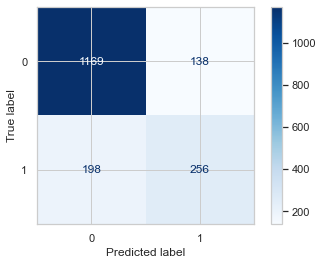

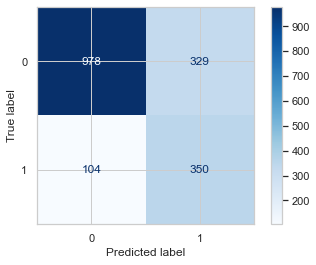

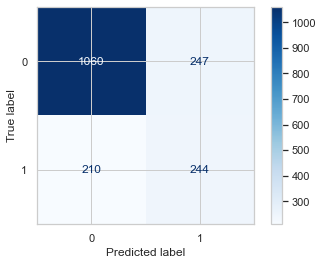

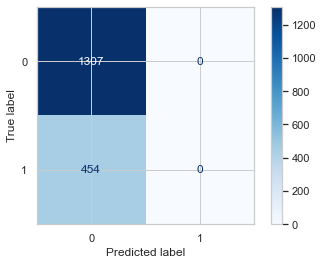

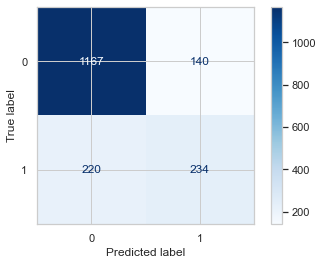

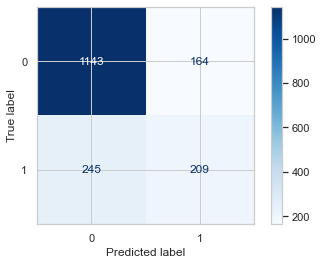

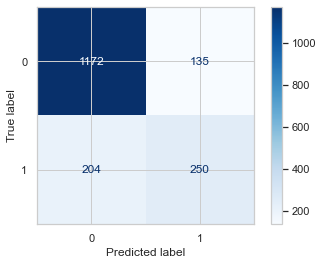

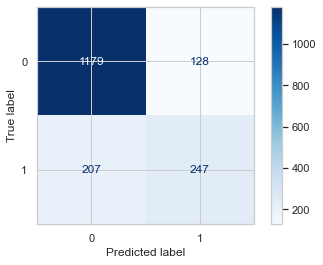

In [53]:
#if we want to do all algoretheme in same for loop

model=[LogisticRegression(),GaussianNB(),DecisionTreeClassifier(),SVC(),RandomForestClassifier(), KNeighborsClassifier(),AdaBoostClassifier(),GradientBoostingClassifier()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy score of",m,'is:',accuracy_score(y_test,predm))
    print('\n')
    print('Confusion matrix of',m,'is:')
    plot_confusion_matrix(m ,x_test , y_test , cmap = 'Blues' )
    print(confusion_matrix(y_test,predm))
    print('\n')
    print('Classification report of',m, 'is:')
    print(classification_report(y_test,predm))
    print('\n')
    print('Cross_val_Score of',m,'is:')
    score=cross_val_score(lg, x, y, cv=5)
    print('\n')
    print(score)
    print('\n')
    print("Score_Mean:", score.mean())
    print('\n')
    print('************************************************************************')
    

we got the best accuracy score of loan approved is 81% from Logistic Regression,GradientBoostingClassifier.lets check the hyperperameter tunning and ensemble technique

# Hyper Parameter tunning

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
#GridSearchCV for Decision tree classifier

grid_param = { "criterion": ["gini","entropy"]}

gd_sr =GridSearchCV(estimator= dtc, param_grid=grid_param,scoring="accuracy", cv=5) #defaut scoring ="accuracy"
gd_sr.fit(x_train,y_train)

best_parameters = gd_sr.best_params_
print(best_parameters)
best_result = gd_sr.best_score_
print(best_result)

{'criterion': 'gini'}
0.7290824517645709


# ROC_AUC Curve

In [56]:
lg=LogisticRegression()
gnb=GaussianNB()
dtc=DecisionTreeClassifier()
sv=SVC()
rf=RandomForestClassifier()
knn=KNeighborsClassifier()
abc=AdaBoostClassifier()
gbc=GradientBoostingClassifier()

lg.fit(x_train,y_train)
gnb.fit(x_train,y_train)
dtc.fit(x_train,y_train)
sv.fit(x_train,y_train)
rf.fit(x_train,y_train)
knn.fit(x_train,y_train)
abc.fit(x_train,y_train)
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

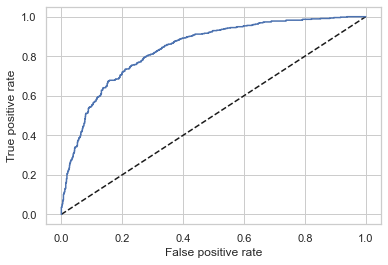

AUC_ROC_SCORE: 0.729145671056224


Predicted value: [0 0 0 ... 0 0 1]
actual value: 5851    0
843     0
5442    0
4792    1
2303    1
       ..
4995    1
6369    0
6779    0
1430    0
1829    0
Name: Churn, Length: 1761, dtype: int32


In [57]:
# as per request AUC and ROC for logistic regration
y_pred_prob=lg.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="LogisticRegression")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
#plt.title("Gradient Boosting Classifier")
plt.show()
auc_score=roc_auc_score(y_test,lg.predict(x_test))
print('AUC_ROC_SCORE:', auc_score)
print('\n')

pred=lg.predict(x_test)
print("Predicted value:",pred)
print("actual value:",y_test)


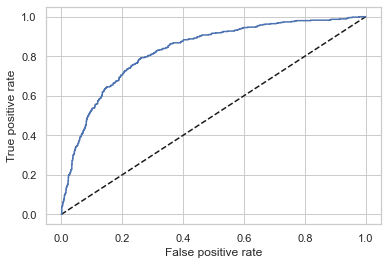

AUC_ROC_SCORE: 0.729145671056224


Predicted value: [0 1 0 ... 0 0 1]
actual value: 5851    0
843     0
5442    0
4792    1
2303    1
       ..
4995    1
6369    0
6779    0
1430    0
1829    0
Name: Churn, Length: 1761, dtype: int32


In [58]:
# as per request AUC and ROC for GaussainNB
y_pred_prob=gnb.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="GaussainNB")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
#plt.title("Gradient Boosting Classifier")
plt.show()
auc_score=roc_auc_score(y_test,lg.predict(x_test))
print('AUC_ROC_SCORE:', auc_score)
print('\n')

pred=gnb.predict(x_test)
print("Predicted value:",pred)
print("actual value:",y_test)

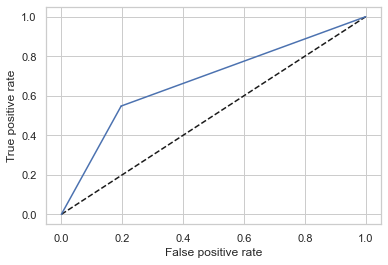

AUC_ROC_SCORE: 0.6762948744308014


Predicted value: [0 0 0 ... 0 0 1]
actual value: 5851    0
843     0
5442    0
4792    1
2303    1
       ..
4995    1
6369    0
6779    0
1430    0
1829    0
Name: Churn, Length: 1761, dtype: int32


In [59]:
# as per request AUC and ROC for dtc
y_pred_prob=dtc.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="DecisionTreeClassifier")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
#plt.title("Gradient Boosting Classifier")
plt.show()
auc_score=roc_auc_score(y_test,dtc.predict(x_test))
print('AUC_ROC_SCORE:', auc_score)
print('\n')

pred=dtc.predict(x_test)
print("Predicted value:",pred)
print("actual value:",y_test)

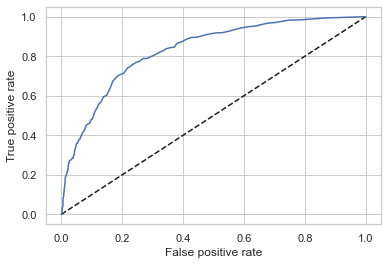

AUC_ROC_SCORE: 0.6972073450650345


Predicted value: [0 0 0 ... 0 0 0]
actual value: 5851    0
843     0
5442    0
4792    1
2303    1
       ..
4995    1
6369    0
6779    0
1430    0
1829    0
Name: Churn, Length: 1761, dtype: int32


In [60]:
# as per requevst AUC and ROC for random forest
y_pred_prob=rf.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Random Forest")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
#plt.title("Gradient Boosting Classifier")
plt.show()
auc_score=roc_auc_score(y_test,rf.predict(x_test))
print('AUC_ROC_SCORE:', auc_score)
print('\n')

pred=rf.predict(x_test)
print("Predicted value:",pred)
print("actual value:",y_test)

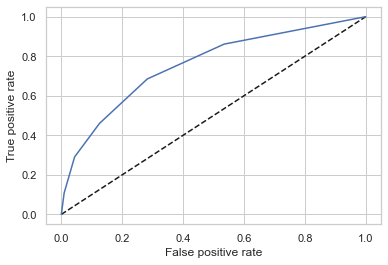

AUC_ROC_SCORE: 0.6674371142846549


Predicted value: [0 0 0 ... 0 0 0]
actual value: 5851    0
843     0
5442    0
4792    1
2303    1
       ..
4995    1
6369    0
6779    0
1430    0
1829    0
Name: Churn, Length: 1761, dtype: int32


In [61]:
# as per requevst AUC and ROC for knn
y_pred_prob=knn.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="KNN")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
#plt.title("Gradient Boosting Classifier")
plt.show()
auc_score=roc_auc_score(y_test,knn.predict(x_test))
print('AUC_ROC_SCORE:', auc_score)
print('\n')

pred=knn.predict(x_test)
print("Predicted value:",pred)
print("actual value:",y_test)

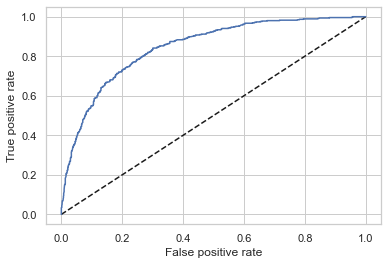

AUC_ROC_SCORE: 0.7236854079524351


Predicted value: [0 0 0 ... 0 0 1]
actual value: 5851    0
843     0
5442    0
4792    1
2303    1
       ..
4995    1
6369    0
6779    0
1430    0
1829    0
Name: Churn, Length: 1761, dtype: int32


In [62]:
# as per requevst AUC and ROC for AdaboosterClassifier
y_pred_prob=abc.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="ABC")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
#plt.title("Gradient Boosting Classifier")
plt.show()
auc_score=roc_auc_score(y_test,abc.predict(x_test))
print('AUC_ROC_SCORE:', auc_score)
print('\n')

pred=abc.predict(x_test)
print("Predicted value:",pred)
print("actual value:",y_test)


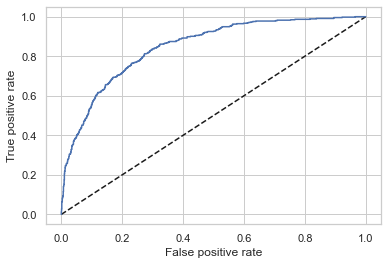

AUC_ROC_SCORE: 0.7230593314885283


Predicted value: [0 0 0 ... 0 0 1]
actual value: 5851    0
843     0
5442    0
4792    1
2303    1
       ..
4995    1
6369    0
6779    0
1430    0
1829    0
Name: Churn, Length: 1761, dtype: int32


In [63]:
# as per requevst AUC and ROC for GradientBoostingClassifier
y_pred_prob=gbc.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="GBC")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
#plt.title("Gradient Boosting Classifier")
plt.show()
auc_score=roc_auc_score(y_test,gbc.predict(x_test))
print('AUC_ROC_SCORE:', auc_score)
print('\n')

pred=gbc.predict(x_test)
print("Predicted value:",pred)
print("actual value:",y_test)

# Saving Model

In [65]:
#we got the highest accuracy score from logistic regression and gaussainNB so we can save our model with it.
import joblib
joblib.dump(gbc,"Customer_Churn_Analysis.obj")

gbc_from_joblib=joblib.load("Customer_Churn_Analysis.obj")